<a href="https://colab.research.google.com/github/seidikun/nivelamento-ml/blob/main/Nivelamento_ML_Aula_3_Intro_a_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3: Introdução a Regressão Linear

Você fez um experimento com um objetivo claro (entender a melhora psicomotora de pacientes com lesão medular? Verificar o aprendizado de uma tarefa por um camundongo? Classificar o pensamento de uma usuária de interface cérebro-máquina?) e desse experimento foram extraídos dados. Dados permeiam todo o nosso mundo tecnológico, e são a fonte de informações para sua pergunta. Mas como responder ela?

Responder pode significar encontrar padrões nos dados e analisar eles de forma objetiva e numérica. E aqui é onde nos encontramos agora: encontrar padrões nos dados.

Esta aula inicia uma série de tutoriais em que vamos finalmente adentrar o mundo do Aprendizado de Máquina: o desenvolvimento de modelos para encontrar padrões nos dados.

## Importar as bibliotecas necessárias

In [ ]:
# Bibliotecas que já conhecemos
import pandas as pd             # Trabalho com dados tabulares
import matplotlib.pyplot as plt # Visualização de figuras e manipulação do tamanho e disposição delas
import seaborn as sns           # API sobre o matplotlib, que facilita a criação e customização das figuras
import numpy as np              # Operações numéricas entre vetores, matrizes, etc

# Biblioteca nova, para a geração de modelos de predição
from sklearn.preprocessing   import RobustScaler        # para auxiliar a regressão logística
from sklearn.model_selection import train_test_split    # separação entre base de treino e de teste
from sklearn.linear_model    import LogisticRegression  # segundo modelo que usaremos

Reconhece as bibliotecas acima? Esperamos que nesta aula você já esteja familiarizada com as bibliotecas pandas, matplotlib, seaborn e numpy, e entenda que elas estão neste notebook para trazer funções poderosas de análise de dados.

O sklearn é uma das principais bibliotecas de implementação e validação de modelos de Aprendizado de Máquina.

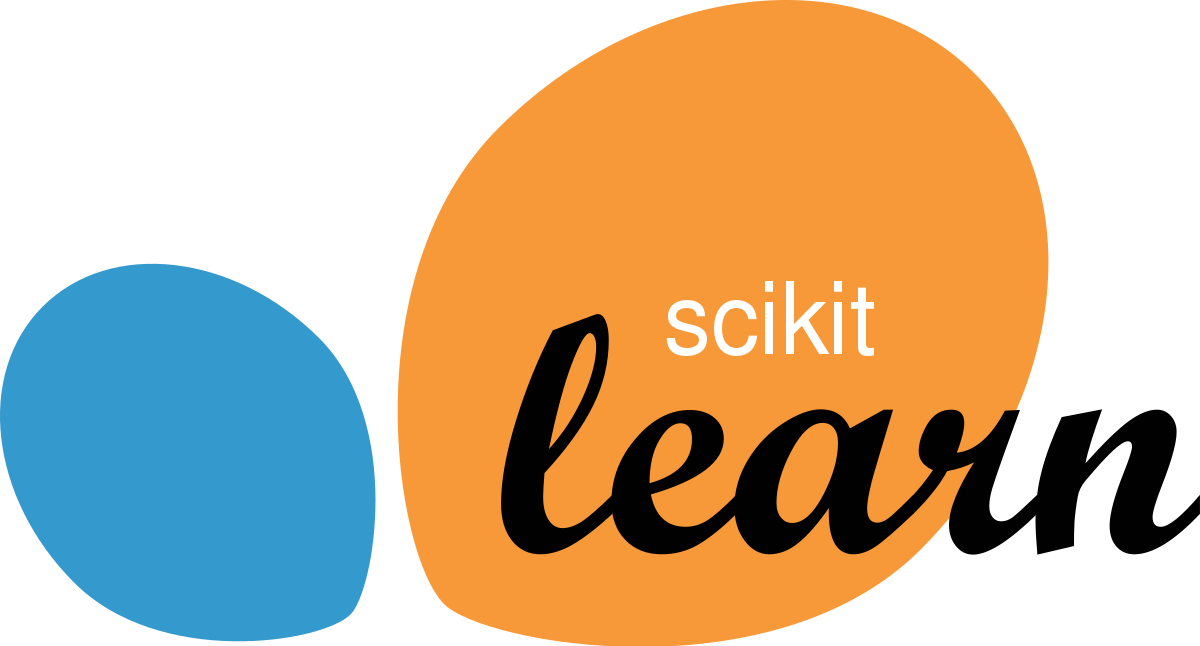

In [ ]:
#@title 

# @markdown Execute essa célula para criar a função de plotagem

def plot_observed_vs_predicted(x, y, y_hat, coef):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    coef (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Dado Real')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Predição')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Resíduos')
  ax.set(
      title=fr"$coeficiente$ = {coef:0.2f}, RMSE = {np.sqrt(np.mean((y - y_hat)**2)):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

## Regressão Linear

Regressão linear é uma forma de encontrar uma reta (linha) como modelo do padrão dos dados.




**[Exercício] Pense por um momento: que dados você conhece que possuem padrões lineares?**


Você deve conhecer a famosa equação de reta:

\begin{equation}
y = a*x + b
\end{equation}


**[Exercício] Altere os valores de a e b no código abaixo e teste sua intuição sobre a equação**


In [ ]:
#@title

#@markdown Execute a célula para iniciar a simulação
import ipywidgets as widgets       # interactive display

@widgets.interact(a=widgets.FloatSlider(1, min=-10, max=10),
                  b=widgets.FloatSlider(0, min=-40, max=40))
def plot_data_estimate(a, b):
  plt.figure(figsize = (10,4))
  x = np.linspace(-20, 20)
  y = a * x + b
  plt.plot(x,y)
  plt.grid()
  plt.vlines(0, -40, 50, 'black')
  plt.hlines(0, -40, 50, 'black')
  plt.ylim(-40, 40)
  plt.xlim(-20, 20)
  title_str = 'y = ' + str(a) + '*x + ' + str(b)
  plt.title(title_str)
  plt.show()


interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

### Pequena intuição sobre regressão linear


A regressão linear realiza de forma automática a busca da reta que mais se aproxima dos dados observados, ou seja, encontra os coeficientes a e b da equação.


Os dados de preço de passagem de avião para o Rio de Janeiro numa data específica foram monitorados ao longo de 40 dias, registrados diariamente. Eles são mostrados abaixo:

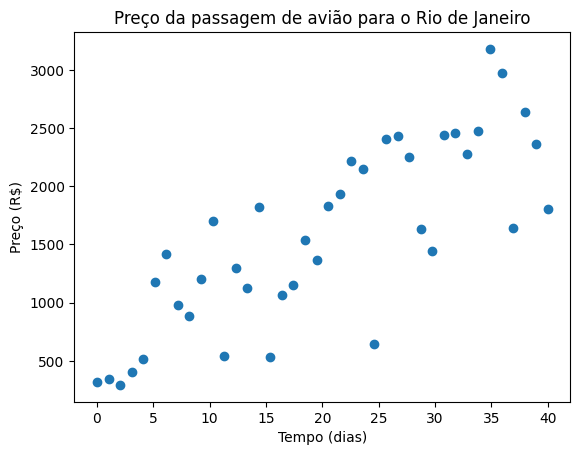

In [ ]:
# @title

# @markdown Execute essa célula para gerar dados

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 60
n_samples = 40

# Draw x and then calculate y
x = np.linspace(0, n_samples, n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)*400  # sample from a standard normal distribution
y = theta * x + noise + 400

# Plot the results
fig, ax = plt.subplots()
plt.title('Preço da passagem de avião para o Rio de Janeiro')
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='Tempo (dias)', ylabel='Preço (R$)');

Observando uma tendência crescente dos preços, você imagina se não é possível predizer essa tendência usando uma equação linear.

**[Exercício] Teste alterar o valor do coeficiente abaixo e veja se você consegue encontrar a melhor reta que explica a distribuição de dados.**

Nota: os resíduos são os erros que a reta tem em relação aos dados, quanto menores os resíduos, melhor a reta de regressão. De forma a sumarizar esses valores em uma única métrica, é calculada a raíz quadrada do erro médio (RMSE): a mesma intuição vale, quanto menor o RMSE, melhor a reta

In [ ]:
#@title

#@markdown Execute a célula para iniciar a simulação
import ipywidgets as widgets       # interactive display

@widgets.interact(a=widgets.FloatSlider(0.5*50, min=0.0, max=2.0*50),
                  b=widgets.FloatSlider(0, min=-2000, max=2000))
def plot_data_estimate(a, b):
  y_hat = a * x + b
  plot_observed_vs_predicted(x, y, y_hat, a)
  plt.show()

  print('Equação do preço:\nPREÇO = ', a, '*x + ', b)

interactive(children=(FloatSlider(value=25.0, description='a'), FloatSlider(value=0.0, description='b', max=20…

### Exemplo de Regressão Linear [Troca de apresentador/a]

Porque não começar já mostrando tudo? 

Abaixo fizemos um código sucinto com todos os passos que vamos aprender nas próximas sessões

**[Exercício] Leia os comentários e o código e vá explicando o seu entendimento a partir do que vimos acima**



Coefficients: 
 [938.23786125]
Erro quadrado médio: 2548.07
Coefficient of determination: 0.47


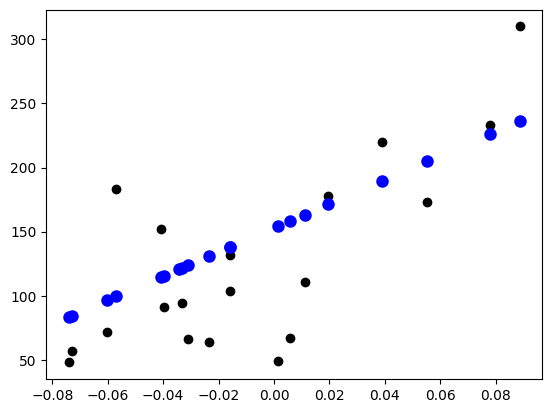

In [ ]:
# Importando bibliotecas
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Carregando o dataset diabetes e escolhendo apenas uma coluna
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Divisão dos dados em treino e teste - vamos ver mais pra frente
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Divisão dos rótulos em treino e teste
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

# Instanciando o modelo de regressão linear do sklearn
regr = LinearRegression()

# Treino do modelo, a partir dos dados observados X e rótulos y
regr.fit(diabetes_X_train, diabetes_y_train)

# Predições sobre os dados de teste
diabetes_y_pred = regr.predict(diabetes_X_test)

# Coeficientes
print("Coefficients: \n", regr.coef_)

# Erro quadrado médio - métrica de validação
print("Erro quadrado médio: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Coeficiente de determinação - medida de quanto a reta explica os dados (0 = nada, 1 = perfeito)
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plotando
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.scatter(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.show()

**[Exercício] Lembra da primeira aula em que falamos dos tipos de treinamento de máquina? Foram eles: supervisionado, não-supervisionado e por reforço. Qual deles foi usado acima? Explique**


## Olhando por partes [Troca de apresentador/a]

Agora, para realmente exemplificar a regressão linear, usaremos o [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dataset.


In [ ]:
!gdown '1yBCzcaHstXKV-c4bdusK3TsxrxnTnb6e'

Downloading...
From: https://drive.google.com/uc?id=1yBCzcaHstXKV-c4bdusK3TsxrxnTnb6e
To: /content/winequality.csv
100% 101k/101k [00:00<00:00, 2.45MB/s]


In [ ]:
# Carregamos o dataset com os dados de vinhos
wines = pd.read_csv('winequality.csv')

In [ ]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5




```
# Isto está formatado como código
```

## Análise Expliratória dos Dados (EDA, sigla em inglês)

Um hábito comum de se ter antes de construir qualquer modelo de aprendizado é o de realizar uma análise exploratória dos dados (*Exploratory Data Analysis*, EDA). Nesta exploração nós verificamos:

*   Tipos dos dados
*   Se existem células sem dados
*   Características estatísticas
*   Distribuições e correlações



Vamos então começar verificando o tipo dos dados e se existe alguma célula sem valor. Como esse dataset é bem didático, não tem problemas de consistência ou dados nulos, mas para criar o hábito iremos verificar o tipo dos dados e depois se existe alguma célula vazia:

**[Exercício] Verifique se existem células com valores nulos no DataFrame**

Dica: talvez exista algum método do [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) que já exiba o que queremos.


In [ ]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Características estatísticas

OK, vamos começar a ver propriedade dos dados mesmos então. Como são todos números (inteiros ou floats), uma boa forma de fazer isso é conferindo as propriedades estatísticas deles.

**[Exercício] Usando uma propriedade dos DataFrames, mostre a média, desvio padrão, valor mínimo, valor máximo e intervalos interquartis de todas as colunas** 

[Resposta](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#### Distribuições

Apesar de ser legal saber os números, é muito mais fácil pras pessoas entenderem esse tipo de informação de forma visual. Então vamos exercitar isso.

**[Exercício] Utilizando o subplot, faça com que**

 * **O primeiro item da figura seja um box plot da densidade de cada qualidade**
 * **O segundo item seja um scatter plot do pH pela acidez fixa**
 * **O terceiro item seja um histograma da variável alcool (use bin=20)**

**PS: Todos os gráficos precisam ter título e os labels em pt-br**

Consultas:

* [box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [scatter plot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
* [histograma](https://seaborn.pydata.org/generated/seaborn.histplot.html)

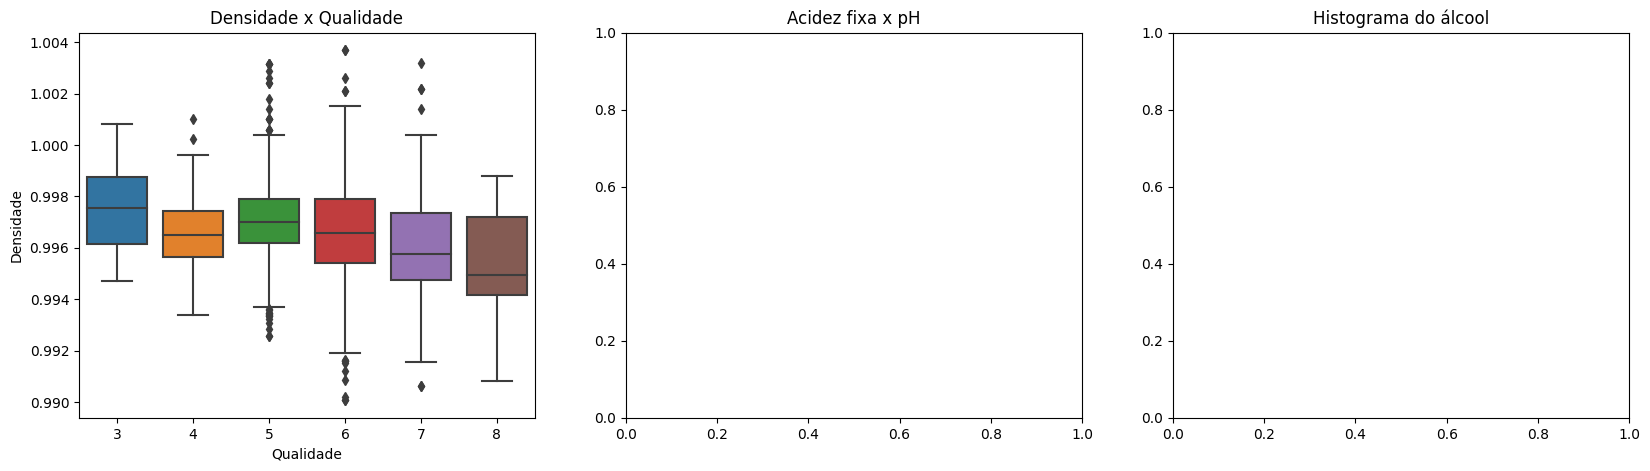

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.boxplot(data=wines, x="quality", y="density")
plt.title('Densidade x Qualidade')
plt.ylabel('Densidade')
plt.xlabel('Qualidade')


plt.subplot(1,3,2)
plt.title('Acidez fixa x pH')
plt.ylabel('')

plt.subplot(1,3,3)
plt.title('Histograma do álcool')
plt.xlabel('')
plt.ylabel('')

plt.show()

#### Informação bônus

Abaixo tem a matriz de correlação entre as variáveis. Na correlação, quanto mais próximo de 0 maior então a independência de uma variável em relação a outra, enquanto que uma correlação perto de 1 ou de -1 indica que as variáveis interferem bastante entre si.

Usando o *citric acid* como exemplo:

* Ele possui uma correlação de 0.7 com a acidez fixa, ou seja, a concentração de ácido cítrico está fortemente correlacionado com o quão ácido o vinho naturalmente é.

* Ele possui uma correlação de 0 com a concentração total de dióxido de enxofre (SO2), ou seja, aumentar ou diminuir a contração do ácido cítrico não interfere na concentração de dióxido de enxofre no vinho.

* Ele possui uma correlação de -0.5 com o pH do vinho, ou seja, aumentar a concentração de ácido cítrico diminui moderadamente o pH do vinho. ~Ainda bem~

<Axes: >

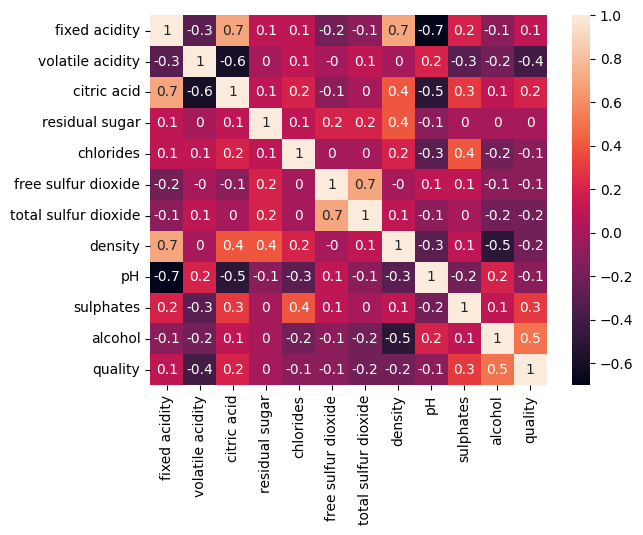

In [ ]:
corr = np.round(wines.corr(),1)

sns.heatmap(corr, annot=True)

### Organizando os dados [Troca de apresentador/a]

A tabela de vinhos foi registrada mostrando os aspectos de cada amostra (colunas do DataFrame). Vamos construir um somellier de vinhos automatizado!

Ou seja, vamos tentar predizer a qualidade do vinho dados os seus aspectos.

In [ ]:
# Uma pequena ajuda para definir a coluna alvo
print(wines.columns.to_list())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


**[Exercício] Escolha a coluna que contenha a qualidade do vinho, esse vai ser nosso gabarito**


In [ ]:
#--Qual coluna escolheremos como alvo?--#
coluna_alvo = 'quality'

X = wines.drop([coluna_alvo], axis=1) # Cria uma cópia do dataset sem a coluna resposta
y = wines[coluna_alvo]                # A coluna resposta

Você percebe como são as coisas? Imagine que os dados do vinho passaram por registro junto a somelliers e eles deram suas respectivas notas de qualidade. Isso formou o nosso dataset original.

Esses dados foram encaminhados a você, para projetar um medidor automatizado de vinhos. A ideia é que se forem fornecidos os aspectos do vinho, esse medidor seja capaz de dizer sua qualidade, dado que ele foi treinado com o dataset.

### Quebra em treino e teste

Antes de proseguirmos, aqui vai um aspecto muito importante de treinamento de máquina: o train-test split (quebra em treino e teste, do inglês). Nós vamos artificialmente particionar o dataset em um conjunto de dados para treinar o modelo, e um conjunto de dados para testar o modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8,test_size=0.2)

**[Exercício] Discuta: porque esse aspecto é importante? Aqui usamos 80% dos dados para treino e 20% para teste. Porque essa proposção? O que pode acontecer se usarmos poucos dados de treino? E poucos dados de teste?**

### Treino do modelo

Abaixo instanciamos um modelo de regressão linear do sklearn e usamos sua função .fit() (do inglês, ajustar ou calibrar) para treinar o modelo

In [ ]:
lr = LinearRegression() # Cria um modelo de regressão linear

lr.fit(X_train, y_train)

LinearRegression()

Está invisível para nós, mas o treino é realizado de forma automática, gerando uma reta que minimiza os resíduos em relação aos dados (lembra do exercício no início do colab?).

Para esta implementação de regressão linear do sklearn, é usado um algoritmo chamado método dos mínimos quadrados (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Não vamos explicar ele aqui, mas saiba que ele gera os parâmetros do modelo que minimizam os resíduos da reta em relação aos dados. Fácil, não? Em duas linhas de código o modelo está treinado.

### Avaliando o modelo

Com o modelo treinado, precisamos avaliar o quão bom ele tá e para isso precisamos de...bem, algum forma de avaliar a qualidade das respostas.

É aí que entram as métricas. Elas serão abordadas com mais detalhes numa próxima aula, então por hoje basta saber que é utilizando alguma função como métrica que descobrimos o quão bem foi o aprendizado do modelo.

Hoje estaremos usando [a raíz quadrada do erro quadrático médio](https://www.alura.com.br/artigos/metricas-de-avaliacao-para-series-temporais) e o [R²-score](https://pt.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition).

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

**[Exercício] Olhe bem para o código: O que é usado para medir o RMSE? e a R²? Interprete o resultado das métricas**

In [ ]:
# avaliando o modelo nos dados de treino
y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("Perfomance do modelo para os dados de treino")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

# avaliando o modelo nos dados de teste
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Perfomance do modelo para os dados de teste")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

Perfomance do modelo para os dados de treino
--------------------------------------
RMSE: 0.6452928166646004
R2 score: 0.3578919148115477


Perfomance do modelo para os dados de teste
--------------------------------------
RMSE: 0.6523304633137316
R2 score: 0.35885487292107854




In [ ]:
y_test_predict.max()

6.730524058463775

In [ ]:
teste = X_test.iloc[2]+1
teste

fixed acidity           14.2000
volatile acidity         1.4600
citric acid              1.5200
residual sugar           3.2000
chlorides                1.0710
free sulfur dioxide     13.0000
total sulfur dioxide    36.0000
density                  2.0006
pH                       4.1000
sulphates                1.5600
alcohol                 10.0000
Name: 603, dtype: float64

In [ ]:
lr.predict([teste])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-22.21394874])

A grande pergunta aqui é o somellier automático é bom? Ele já pode substituit os somelliers humanos?

In [ ]:
lr.coef_.shape

(11,)

In [ ]:
pd.Series(lr.coef_.T, index= X.columns)

fixed acidity            0.033986
volatile acidity        -0.989608
citric acid             -0.141347
residual sugar           0.015099
chlorides               -1.162166
free sulfur dioxide      0.005314
total sulfur dioxide    -0.003338
density                -26.168395
pH                      -0.376690
sulphates                0.936546
alcohol                  0.276418
dtype: float64

**[Atividade para casa]**

Tente criar outro modelo de regresão linear utilizando outra coluna como alvo ou então diminuindo a quantidade de variáveis para a de qualidade. Tente também explorar outros gráficos no EDA, seja mudando as variáveis ou então o tipo de gráfico.